# <p style="background-color:#9C27B0; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Capstone Project | E-commerce Product Delivery Prediction</p>

<img src="img.JPG" width="100%" height="60%">

<div style="border-radius:10px; padding: 15px; background-color:rgb(241, 191, 250); font-size:120%; text-align:left">

<h3 align="left"><font color=purple><b>Problem:</b></font></h3>

<font color=black>
In this project, we analyze a dataset containing shipment, customer, and product details from an <b>international e-commerce</b> company.

The primary goal is to build a predictive model capable of accurately determining whether a product will be delivered on time or delayed. Since late deliveries negatively impact customer satisfaction and business reputation, our focus is on minimizing false negatives — i.e., ensuring the model correctly identifies potential late deliveries. Therefore, recall for the late delivery class is a critical evaluation metric for this project.</font>

<div style="border-radius:10px; padding: 15px; background-color:rgb(241, 191, 250); font-size:115%; text-align:left">
  <h3 style="color:purple;"><b>Objectives:</b></h3>
  <ul style="color:black;">
    <li><b>Explore the Dataset:</b> Uncover patterns, distributions, and relationships within the data.</li>
    <li><b>Conduct Extensive Exploratory Data Analysis (EDA):</b> Dive deep into bivariate relationships against the target.</li>
    <li><b>Preprocessing Steps:</b>
      <ul>
        <li>Remove irrelevant features</li>
        <li>Address missing values</li>
        <li>Treat outliers</li>
        <li>Encode categorical variables</li>
        <li>Transform skewed features to achieve normal-like distributions</li>
      </ul>
    </li>
    <li><b>Model Building:</b>
      <ul>
        <li>Establish pipelines for models that require scaling</li>
        <li>Implement and tune classification models: Logistic Regression, SVM, Decision Trees, Random Forest</li>
        <li>Emphasize high recall for class 1 to ensure comprehensive identification of heart patients</li>
      </ul>
    </li>
    <li><b>Evaluate and Compare Model Performance:</b> Utilize precision, recall, and F1-score to gauge models' effectiveness.</li>
  </ul>
</div>


<style>
a {
  color: #00004d !important;  /* Or any color you like */
  text-decoration:none;   /* Optional: removes underline */
  font-family:cambria;
}
</style>

<a id="contents_table"></a>

<div style="border-radius:10px; padding: 15px; background-color: rgb(241, 191, 250); font-size:100%; text-align:left;">

<h3 align="left"><font color="purple"><b>Table of Contents:</b></font></h3>

* [Step 1 | Import Libraries](#import)
* [Step 2 | Load the Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [3.1 | Basic Information](#basic_info)
    - [3.2 | Summary Statistics](#summary_stats)
* [Step 4 | Exploratory Data Analysis](#eda)
    - [4.1 | Univariate Analysis](#univariate)
        - [4.1.1 | Categorical Features](#cat_uni)
        - [4.1.2 | Numerical Features](#num_uni)
    - [4.2 | Bivariate Analysis](#bivariate)
        - [4.2.1 | Target vs Categorical Features](#target_cat)
        - [4.2.2 | Target vs Numerical Features](#target_num)
        - [4.2.3 | Correlation Matrix](#correlation)
* [Step 5 | Data Pre-processing](#preprocessing)
    - [5.1 | Split Features & Target](#split)
    - [5.2 | Column Transformer](#transformer)
    - [5.3 | Train-Test Split](#train_test)
* [Step 6 | Model Building](#model_building)
    - [6.1 | Build Model](#model_build)
    - [6.2 | Parameter Tuning](#param_tuning)
    - [6.3 | GridSearchCV Setup](#gridsearch)
* [Step 7 | Model Evaluation](#evaluation)
    - [7.1 | Accuracy, Precision, Recall, F1-Score](#metrics)
    - [7.2 | ROC Curve](#roc)
    - [7.3 | Classification Report](#classification_report)
* [Step 8 | Model Comparison](#comparison)
    - [8.1 | Bar Plot of Metrics](#bar_plot)
    - [8.2 | Extract from Best Model Pipeline](#best_pipeline)
    - [8.3 | Plot Top Features](#top_features)
* [Step 9 | Conclusion](#conclusion)

⬆️ **[Back to Top](#contents_table)**
</div>





<a id="import"></a>
## <p style="background-color:#9C27B0; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Contents](#contents_table)

In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, roc_curve,mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import ipywidgets as widgets
from IPython.display import display, HTML

from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings('ignore')



<a id="read"></a>
## <p style="background-color:#9C27B0; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 2 | Load the dataset</p>

⬆️ [Contents](#contents_table)

In [3]:

df = pd.read_csv("E_Commerce.csv")

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.shape

(10999, 12)

<a id="overview"></a>
## <p style="background-color:#9C27B0; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Contents](#contents_table)


<a id="overview"></a>
## <b><span style='color:#ff00ff'>Step 3.1 |</span><span style='color:#ff00ff'> Dataset Basic Information</span></b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.dtypes       #Checking data types of the columns

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [7]:
df.isnull().sum()       #Checking for null/missing values

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
df.duplicated().sum()     #Checking for duplicate values

np.int64(0)

<a id="overview"></a>
## <b><span style='color:#ff00ff'>Step 3.2 |</span><span style='color:#ff00ff'> Summary Statistics for Numerical Variables</span></b></span></b>


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


<a id="overview"></a>
## <b><span style='color:#ff00ff'>Step 3.3 |</span><span style='color:#ff00ff'> Summary Statistics for Numerical Variables</span></b></span></b>

In [10]:
df.describe(include=object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


<a id="eda"></a>
## <p style="background-color:#9C27B0; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 4 | Exploratory Data Analysis</p>

⬆️ [Contents](#contents_table)



<div style="border-radius:10px; padding: 15px; background-color: #E1BEE7; font-size:115%; text-align:left">

<font color=Black>For <b>Exploratory Data Analysis (EDA)</b>, we'll follow two main steps:

<b>• Univariate Analysis</b> – We'll look at each feature by itself to understand its values and distribution.

<b>• Bivariate Analysis</b> – We'll check how each feature relates to the target variable to see which ones might be important for prediction.

This will help us understand the data better and find useful patterns for our model.

In The Exploratory Data Analysis, I Will Be Looking At The <b>Relationship Between The Target Variable And The Other Variables.</b> I Will Also Be Looking At The Distribution Of The Variables Across The Dataset, In Order To Understand The Data In A Better Way.</font>

<a id="univariate"></a>
# <b><span style='color:#ff00ff'>Step 4.1 |</span><span style='color:#ff00ff'> Univariate Analysis</span></b></span></b>
<a id="cat_uni"></a>
### <b><span style='color:#ff00ff'>Step 4.1.1 |</span><span style='color:#ff00ff'> Categorical Feature</span></b></span></b>
⬆️ [Contents](#contents_table)

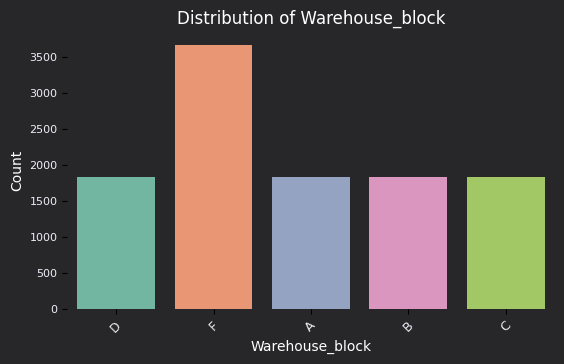

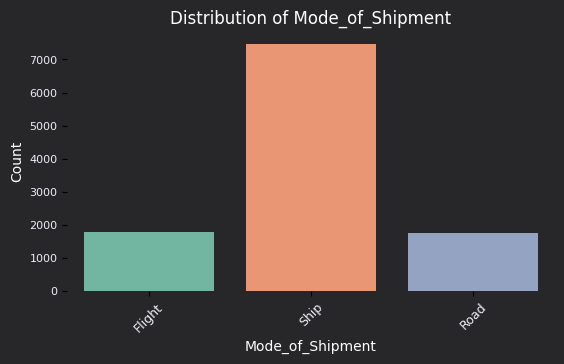

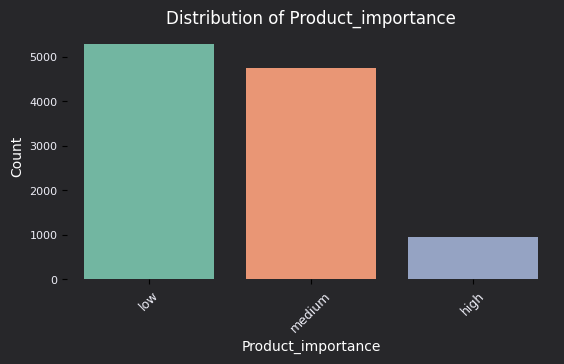

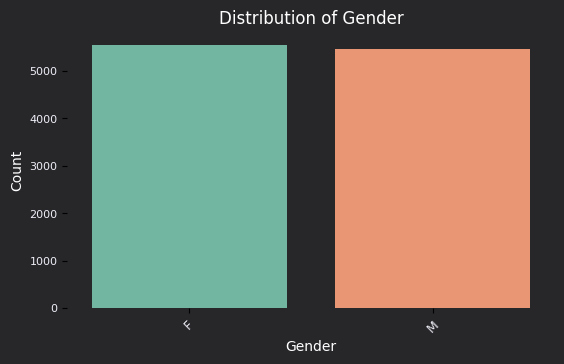

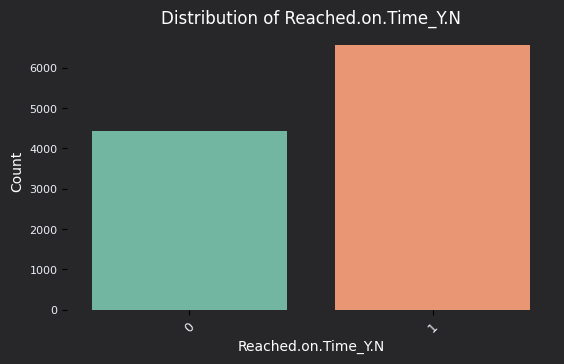

In [11]:

categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

for col in categorical_cols:
    
    fig = plt.figure(figsize=(6, 4))
    fig.patch.set_facecolor("#27272AFE")  # Dark outer background

    sns.countplot(data=df, x=col, palette='Set2')  # Soft bar colors

    ax = plt.gca()
    ax.set_facecolor("#27272AFE")  # Inner plot background

    plt.title(f'Distribution of {col}', fontsize=12, color="white")
    
    plt.xticks(rotation=45, fontsize=9, color="#EEEEF7")  # X-axis tick color
    plt.yticks(fontsize=8, color="#EEEEF7")               # Y-axis tick color

    plt.xlabel(col, color='white')
    plt.ylabel("Count", color='white')

    # Remove all spines (borders)
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout(pad=2.0)
    plt.show()


<a id="num_uni"></a>
## <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>4.1.2. Numerical Features</span></b>
⬆️ [Contents](#contents_table)

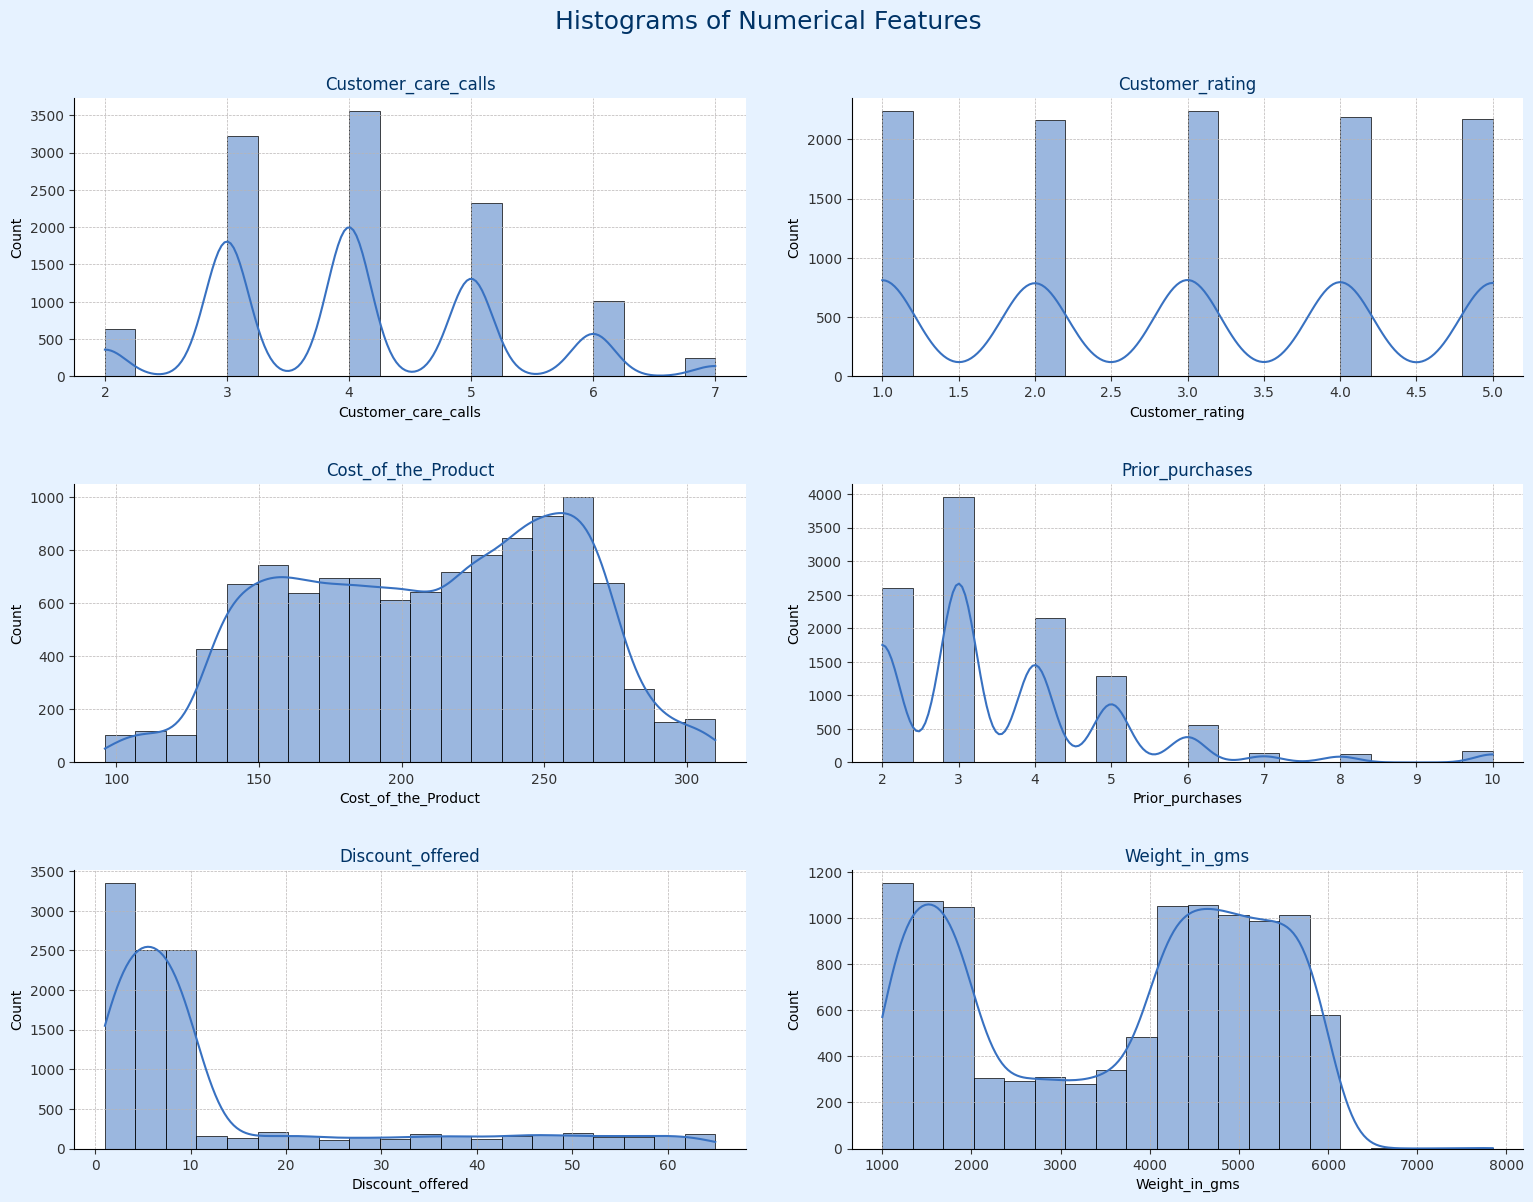

In [12]:
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Set background color for the full figure
fig.patch.set_facecolor('#e6f2ff')  # Light blue

# Loop through each subplot and plot the histogram
for ax, col in zip(axes.flatten(), numerical_cols):
    sns.histplot(data=df,x=col,bins=20,kde=True,ax=ax,color="#3871C1", edgecolor='black', linewidth=0.5)
    #df[col].hist(ax=ax, bins=20, color='#336699', edgecolor='black')  # Navy bars
    ax.set_title(col, color='#003366', fontsize=12)                   # Dark blue title
    ax.set_facecolor('#ffffff')  # Off-white background for subplot
    ax.tick_params(colors='#333333')  # Dark grey tick labels
    
     # Light horizontal grid lines
    ax.grid(axis='both', color="#b9b5b5", linestyle='--', linewidth=0.5)

    # Clean up borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust spacing and add super title
plt.tight_layout(pad=3.0)
plt.suptitle("Histograms of Numerical Features", fontsize=18, y=1.02, color='#003366')
plt.show()



<a id="bivariate"></a>
## <b><span style='color:#ff00ff'>Step 4.2 |</span><span style='color:#ff00ff'> Bivariate Analysis(how features relate to the target)</span></b></span></b>
<a id="cat_target"></a>
### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>4.2.1. Target vs Categorical Features</span></b></span></b>
⬆️ [Contents](#contents_table)

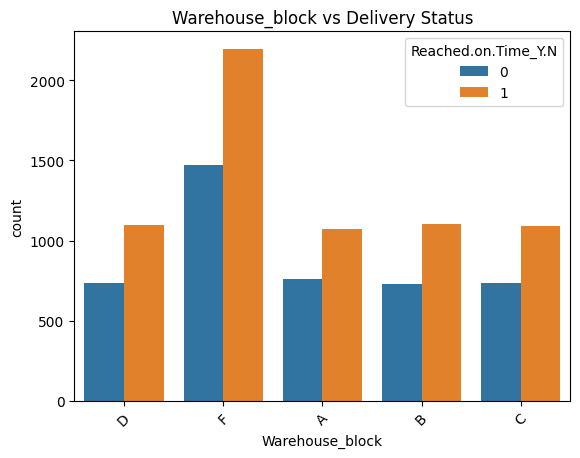

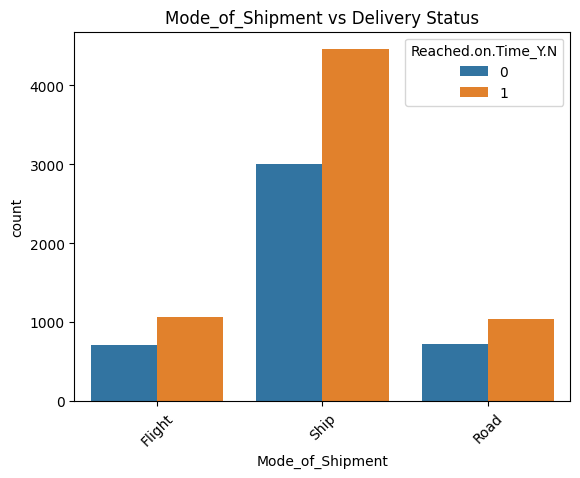

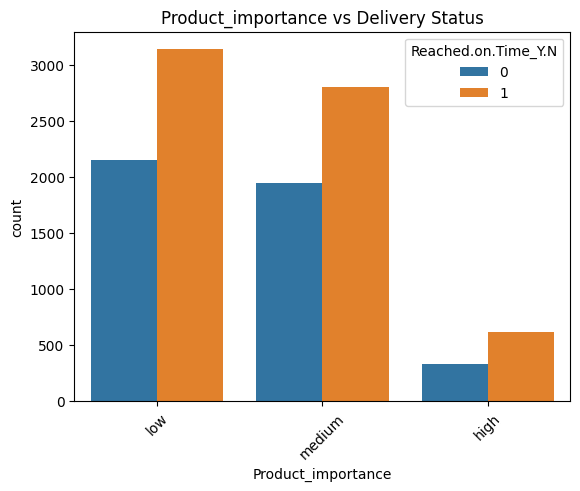

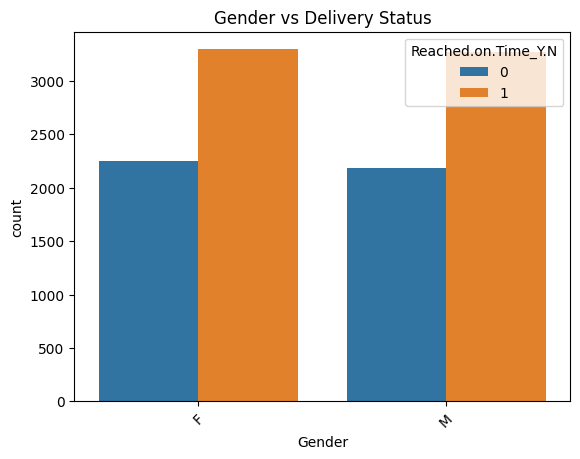

In [13]:
for col in categorical_cols[:-1]:
    
    sns.countplot(data=df, x=col, hue='Reached.on.Time_Y.N')
    plt.title(f'{col} vs Delivery Status')
    plt.xticks(rotation=45)
    plt.show()


<a id="num_target"></a>
### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>4.2.2. Target vs Numerical Features</span></b></span></b>
⬆️ [Contents](#contents_table)


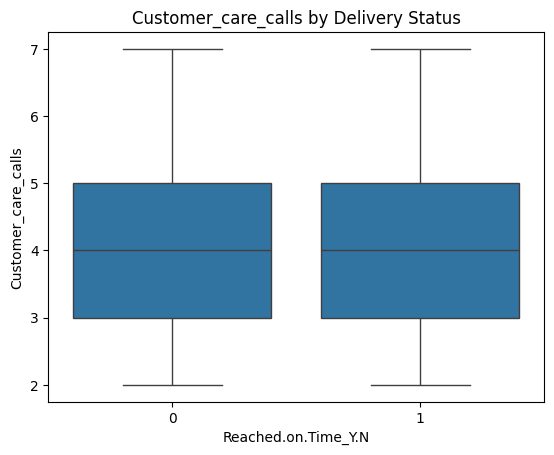

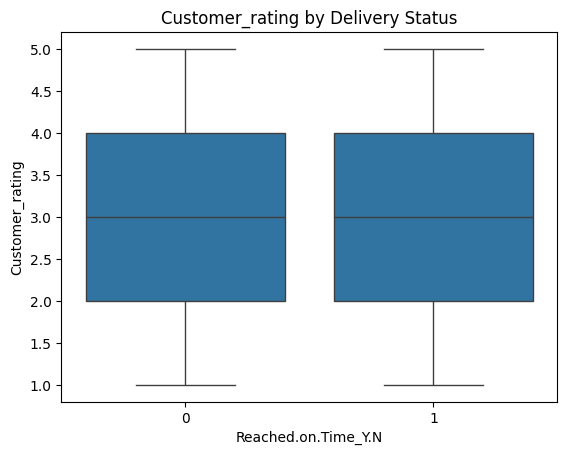

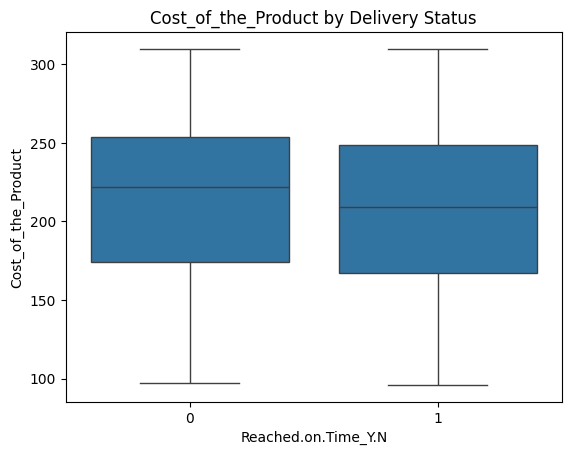

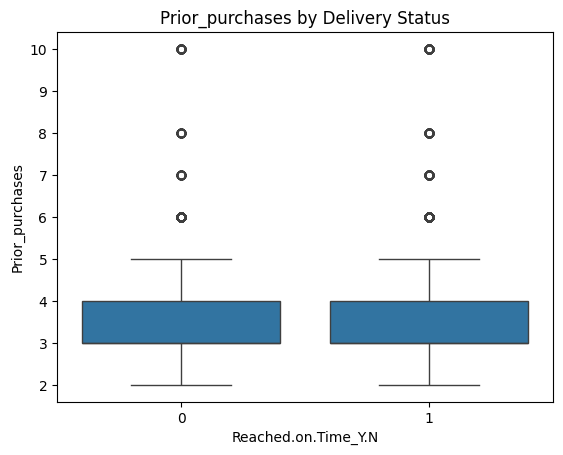

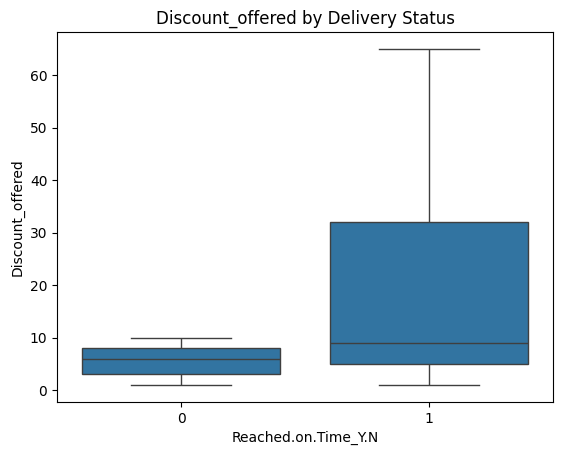

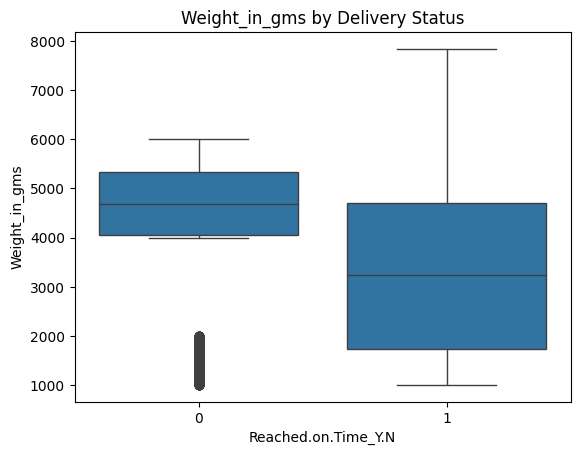

In [14]:
for col in numerical_cols:
    sns.boxplot(data=df, x='Reached.on.Time_Y.N', y=col)
    plt.title(f'{col} by Delivery Status')
    plt.show()


<a id="cor"></a>
### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>4.2.3. Correlation Matrix</span></b></span></b>

⬆️ [Contents](#contents_table)


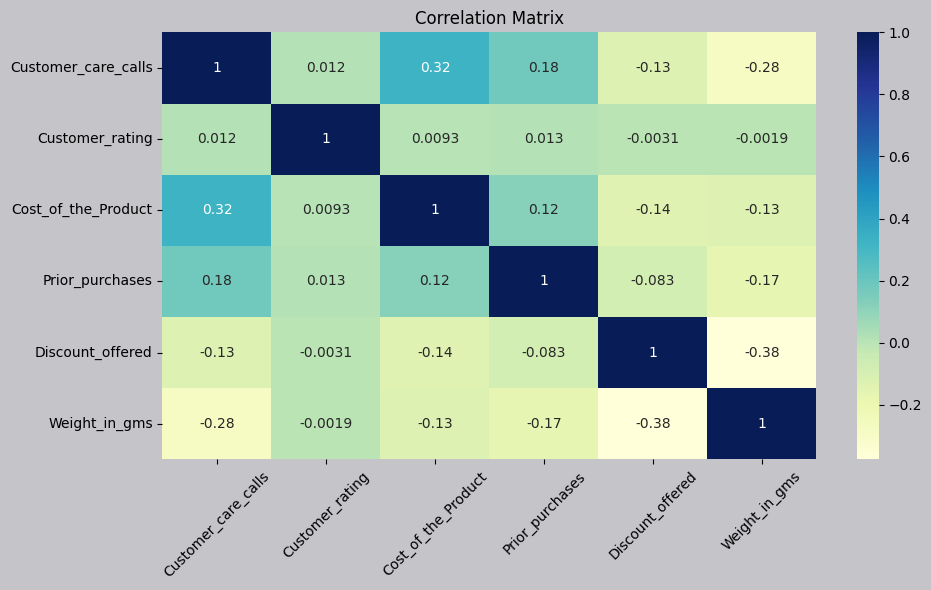

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.gcf().patch.set_facecolor("#c4c4c9")  # Figure background
plt.tight_layout()
plt.show()


<a id="out"></a>
## <b><span style='color:#ff00ff'>Step 4.2.4. </span><span style='color:#ff00ff'>    Outlier's Treatment</span></b></span></b>

⬆️ [Contents](#contents_table)


In [16]:
# List of numerical columns to check for outliers
check_cols = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms', 'Prior_purchases']

print("Outlier Count by Column:\n")

for col in check_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"{col}: {outlier_count} outliers")

Outlier Count by Column:

Cost_of_the_Product: 0 outliers
Discount_offered: 2209 outliers
Weight_in_gms: 0 outliers
Prior_purchases: 1003 outliers


In [17]:
import numpy as np

# Drop only numerical columns
corr_matrix = df.select_dtypes(include=[np.number]).corr().abs()

# Take upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > threshold (0.9 here)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated columns to drop:", to_drop)

# Drop from dataframe
df.drop(columns=to_drop, inplace=True)

Highly correlated columns to drop: []


In [18]:
# Drop column
df.drop(['ID', 'Gender'], axis=1, inplace=True)

In [19]:
df.shape

(10999, 10)

In [20]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1


<a id="preprocessing"></a>
## <p style="background-color:#9C27B0; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 5 | Data Pre-processing</p>

⬆️ [Contents](#contents_table)

<a id="split"></a>
## <b><span style='color:#ff00ff'>Step 5.1 | Split Features and Target Variables</span></b>

⬆️ [Contents](#contents_table)

<div style="border-radius:10px; padding: 15px; background-color: #191122ff; font-size:115%; text-align:left">
<font color=white>Separate the independent features (**X**) and the target variable (**y**) for training and testing. 

In [21]:
X=df.drop('Reached.on.Time_Y.N', axis=1)
y=df['Reached.on.Time_Y.N']




<a id="transformer"></a>
## <b><span style='color:#ff00ff'>Step 5.2 |Column Transformer</span></b>

⬆️ [Contents](#contents_table)


<div style="border-radius:10px; padding: 15px; background-color: #191122ff; font-size:115%; text-align:left">
<font color=white>We set up a `ColumnTransformer` to:

- Scale numerical features
- Encode categorical features

This ensures the model sees data in the right format.

- SMOTE is for Handling Imbalanced Data

In [22]:
# numeric, categorical, ordinal columns
num_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

cat_features = ['Mode_of_Shipment', 'Warehouse_block']
ord_features = ['Product_importance']

# preprocessing
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features),
    ('ord', OrdinalEncoder(), ord_features)
])

# pipeline with SMOTE AFTER preprocessing 
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE()),   # SMOTE sees only numerical output
    ('model', RandomForestClassifier())
])


<a id="train_test"></a>

### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>5.3. Train-Test-Split</span></b></span></b>
⬆️ [Contents](#contents_table)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Training and Testing Data
print(f'Training Data : {X_train.shape} | Testing Data : {X_test.shape}')


Training Data : (8799, 9) | Testing Data : (2200, 9)


In [25]:
df.shape

(10999, 10)

<a id="model_building"></a>
## <p style="background-color:#9C27B0; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 6 | Model Building</p>




<a id="model_build"></a>
### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>6.1  Model Build</span></b></span></b>
⬆️ [Contents](#contents_table)


In [26]:
# Define models 
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Store results
results = {}

# Loop through and train each model
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Accuracy: {acc * 100:.2f}%")

# Find the best model
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

print("\n💠 Best Model:")
print(f"Model is: {best_model_name} | Accuracy is: {best_accuracy * 100:.2f}%")
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("-" * 50)

  


RandomForest Accuracy: 66.91%

LogisticRegression Accuracy: 63.59%

DecisionTree Accuracy: 63.73%

KNN Accuracy: 63.14%

💠 Best Model:
Model is: RandomForest | Accuracy is: 66.91%



<a id="parameter_tuning"></a>

### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>6.2. Parameter Tunning</span></b></span></b>
⬆️ [Contents](#contents_table)

In [27]:
#  define models and hyperparameters
models = {
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'KNN': KNeighborsClassifier()
}

param_grid = {
    'RandomForest': {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20]
    },
    'DecisionTree': {
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_split': [2, 5]
    },
    'LogisticRegression': {
        'clf__C': [0.01, 0.1, 1, 10]
    },
    'KNN': {
        'clf__n_neighbors': [3, 5, 7]
    }
}





<a id="gridsearchcv"></a>

### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>6.3. GridSearchCV setup</span></b></span></b>

⬆️ [Contents](#contents_table)

<div style="border-radius:10px; padding: 15px; background-color: #191122ff; font-size:115%; text-align:left">

<font color=white>
‣ We train all models with default hyperparameters first.  

‣ The best-performing model will then undergo hyperparameter tuning.

‣ We fine-tune the best model using `GridSearchCV` with cross-validation 
to find the optimal hyperparameters.

In [28]:
#  2. Loop through models
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics_summary = {}
best_pipelines={}

for name, model in models.items():
    pipe = ImbPipeline([
        ('preprocessor', preprocessor),  # Only encode categoricals
        ('smote', SMOTE(random_state=42)),
        ('clf', model)
    ])

    grid = GridSearchCV(pipe, param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    best_pipelines[name] = grid  #  store the GridSearchCV

    metrics_summary[name] = {
        'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1
    }

    print(f"\n💠{name} Results:")
    print("===================================")
    print("Best Parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.2%}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


💠RandomForest Results:
Best Parameters: {'clf__max_depth': 10, 'clf__n_estimators': 200}
Accuracy: 69.18%
[[853  42]
 [636 669]]
              precision    recall  f1-score   support

           0       0.57      0.95      0.72       895
           1       0.94      0.51      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.79      0.69      0.68      2200


💠DecisionTree Results:
Best Parameters: {'clf__max_depth': 10, 'clf__min_samples_split': 5}
Accuracy: 67.23%
[[769 126]
 [595 710]]
              precision    recall  f1-score   support

           0       0.56      0.86      0.68       895
           1       0.85      0.54      0.66      1305

    accuracy                           0.67      2200
   macro avg       0.71      0.70      0.67      2200
weighted avg       0.73      0.67      0.67      2200


💠LogisticRegression Results:
Best Parameters: {'clf__C': 1}
Accuracy: 65.64%
[[753

In [29]:
#  3. After loop: Find best model
best_model_name = max(metrics_summary, key=lambda k: metrics_summary[k]['Accuracy'])
best_metrics = metrics_summary[best_model_name]

print("💠 Best Model Overall:")
print("-----------------------------------")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_metrics['Accuracy']:.2%}")
print(f"Precision: {best_metrics['Precision']:.2%}")
print(f"Recall: {best_metrics['Recall']:.2%}")
print(f"F1-Score: {best_metrics['F1-Score']:.2%}")

💠 Best Model Overall:
-----------------------------------
Model: RandomForest
Accuracy: 69.18%
Precision: 94.09%
Recall: 51.26%
F1-Score: 66.37%


In [30]:
print("Best model:", best_model_name)
print("Best params:", best_pipelines[best_model_name].best_params_)

Best model: RandomForest
Best params: {'clf__max_depth': 10, 'clf__n_estimators': 200}


<a id="evaluation"></a>
## <p style="background-color:#9C27B0; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 7 | Model Evaluation</p>

⬆️ [Contents](#contents_table)


In [31]:
#Accuracy Score
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.6381818181818182



<a id="metrics"></a>

### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>7.1. Accuracy, Precision, Recall, F1-Score</span></b></span></b>
⬆️ [Contents](#contents_table)

<div style="border-radius:10px; padding: 15px; background-color: #2a172dff; font-size:115%; text-align:left">

<font color=white>Confusion-matrix - Visualize how well the final model predicts on-time vs delayed deliveries.

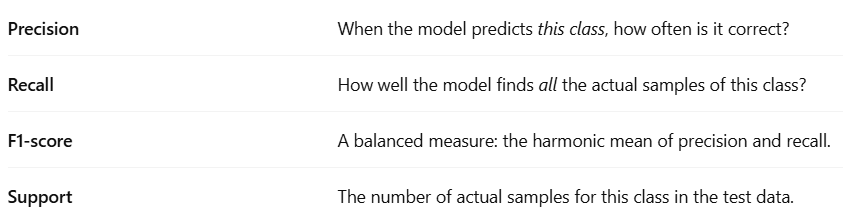

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.77      0.63       895
           1       0.78      0.55      0.64      1305

    accuracy                           0.64      2200
   macro avg       0.66      0.66      0.64      2200
weighted avg       0.68      0.64      0.64      2200

Classification Report:
 [[689 206]
 [590 715]]


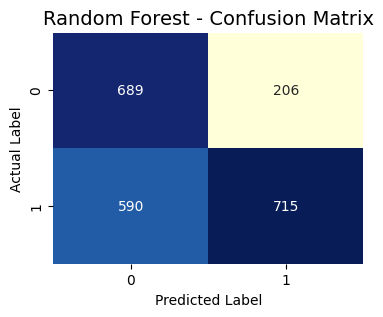

In [32]:
#Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Classification Report:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
# Plot: Confusion Matrix + Report
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Random Forest - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


<a id="roc"></a>

### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>7.2. ROC Curve</span></b></span></b>
⬆️ [Contents](#contents_table)

<div style="border-radius:10px; padding: 15px; background-color: #38233bff; font-size:115%; text-align:left">

<font color=white>
- It’s a plot that shows how well your classification model separates the positive and negative classes at different thresholds.

- shows how well your Random Forest separates On-Time vs Late deliveries at different probability thresholds.

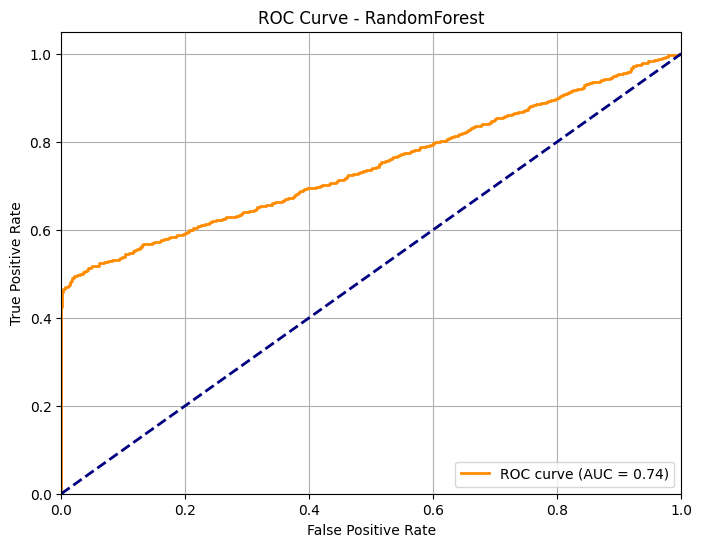

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#  Get best estimator from GridSearchCV results
final_model = best_pipelines[best_model_name].best_estimator_

#  Get predicted probabilities for class 1
y_proba = final_model.predict_proba(X_test)[:, 1]

#  Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

#  Plot it
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



<a id="classification_report"></a>

### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>7.3. Classification report</span></b></span></b>
⬆️ [Contents](#contents_table)


===== RandomForest =====
Accuracy: 69.1818
Precision: 94.0928
Recall: 51.2644
F1-Score: 66.3690
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.95      0.72       895
           1       0.94      0.51      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.79      0.69      0.68      2200



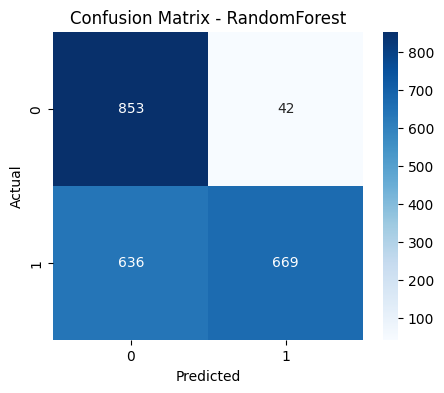


===== DecisionTree =====
Accuracy: 67.2273
Precision: 84.9282
Recall: 54.4061
F1-Score: 66.3241
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.86      0.68       895
           1       0.85      0.54      0.66      1305

    accuracy                           0.67      2200
   macro avg       0.71      0.70      0.67      2200
weighted avg       0.73      0.67      0.67      2200



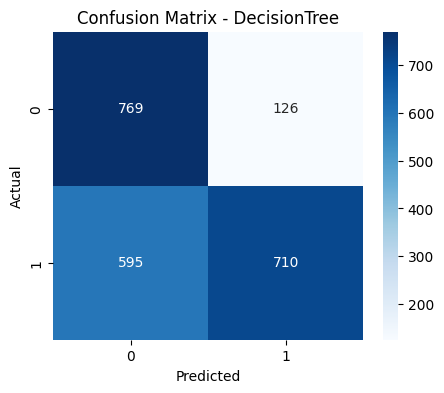


===== LogisticRegression =====
Accuracy: 65.6364
Precision: 82.9532
Recall: 52.9502
F1-Score: 64.6399
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.84      0.67       895
           1       0.83      0.53      0.65      1305

    accuracy                           0.66      2200
   macro avg       0.69      0.69      0.66      2200
weighted avg       0.72      0.66      0.65      2200



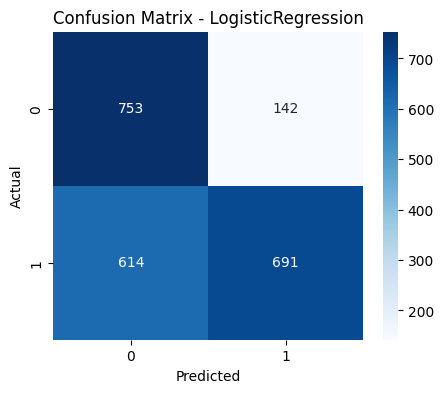


===== KNN =====
Accuracy: 63.8182
Precision: 77.6330
Recall: 54.7893
F1-Score: 64.2408
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.77      0.63       895
           1       0.78      0.55      0.64      1305

    accuracy                           0.64      2200
   macro avg       0.66      0.66      0.64      2200
weighted avg       0.68      0.64      0.64      2200



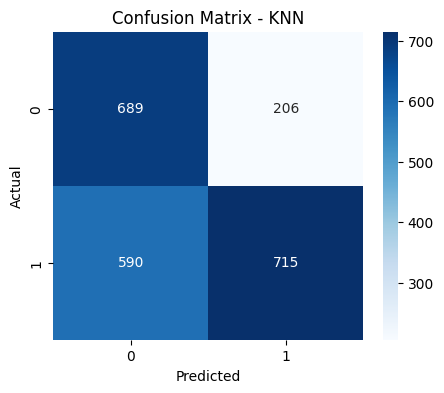

In [34]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Dictionary to store all confusion matrices
all_confusion_matrices = {}

for name, grid in best_pipelines.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    all_confusion_matrices[name] = cm

    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc* 100:.4f}")
    print(f"Precision: {prec * 100:.4f}")
    print(f"Recall: {rec * 100:.4f}")
    print(f"F1-Score: {f1 * 100:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


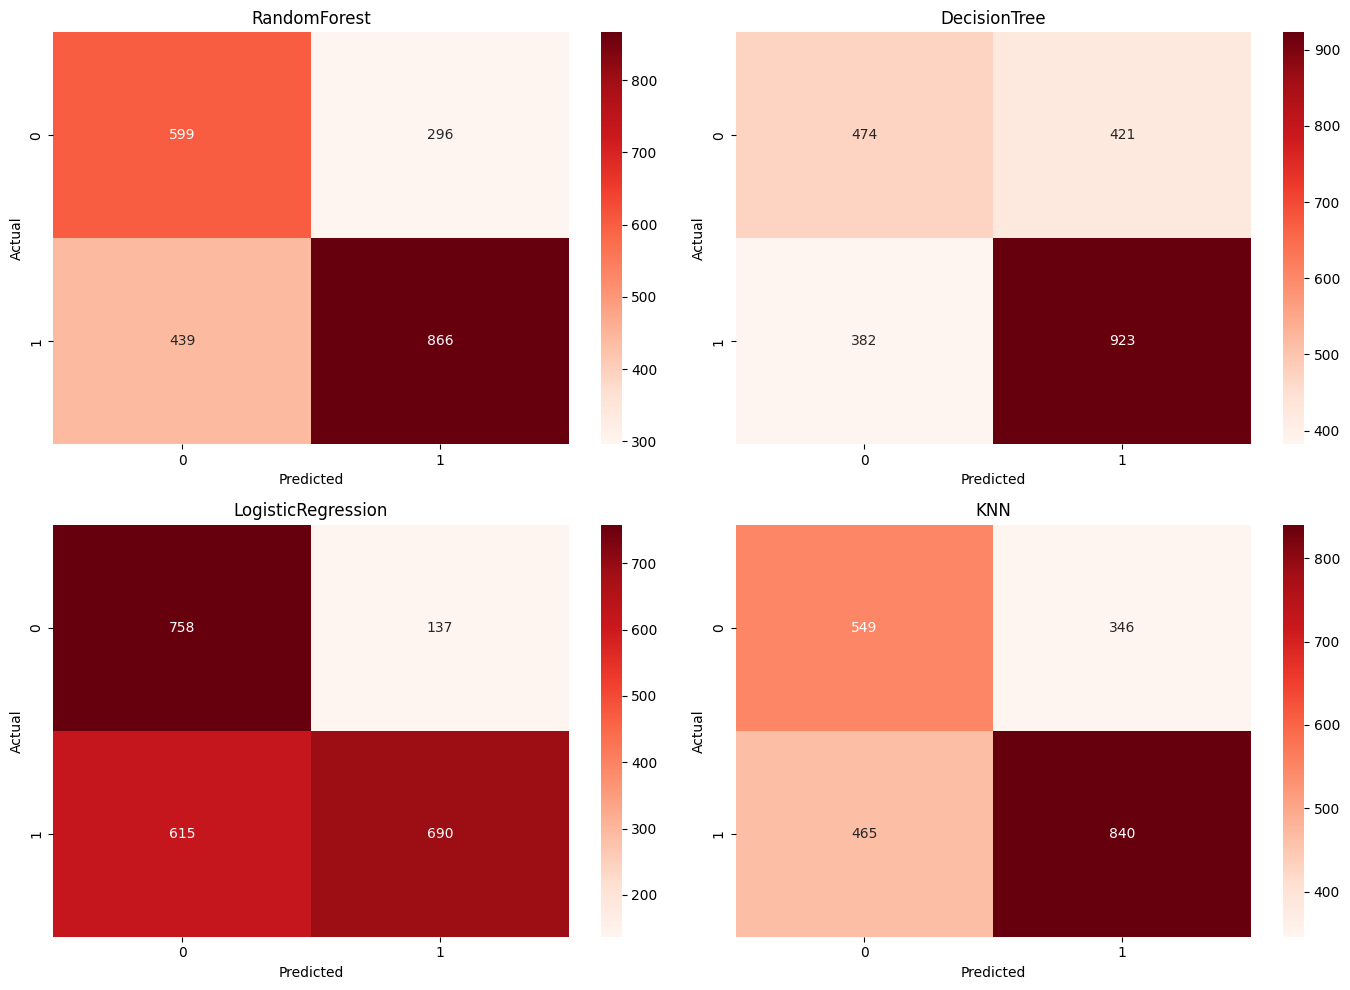

In [35]:
# Setup subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop through models and plot
for idx, (name, model) in enumerate(models.items()):
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

    # # Print classification report
    # print(f"\n======== {name} =========")
    # print(classification_report(y_test, y_pred))

plt.tight_layout()
plt.show()


<a id="comparison"></a>
## <p style="background-color:#9C27B0; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 8 | Model Comparison: Accuracy</p>
⬆️ [Contents](#contents_table)



<a id="bar_plot"></a>

### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>8.1 Bar plot comparison of metrics</span></b></span></b>
⬆️ [Contents](#contents_table)

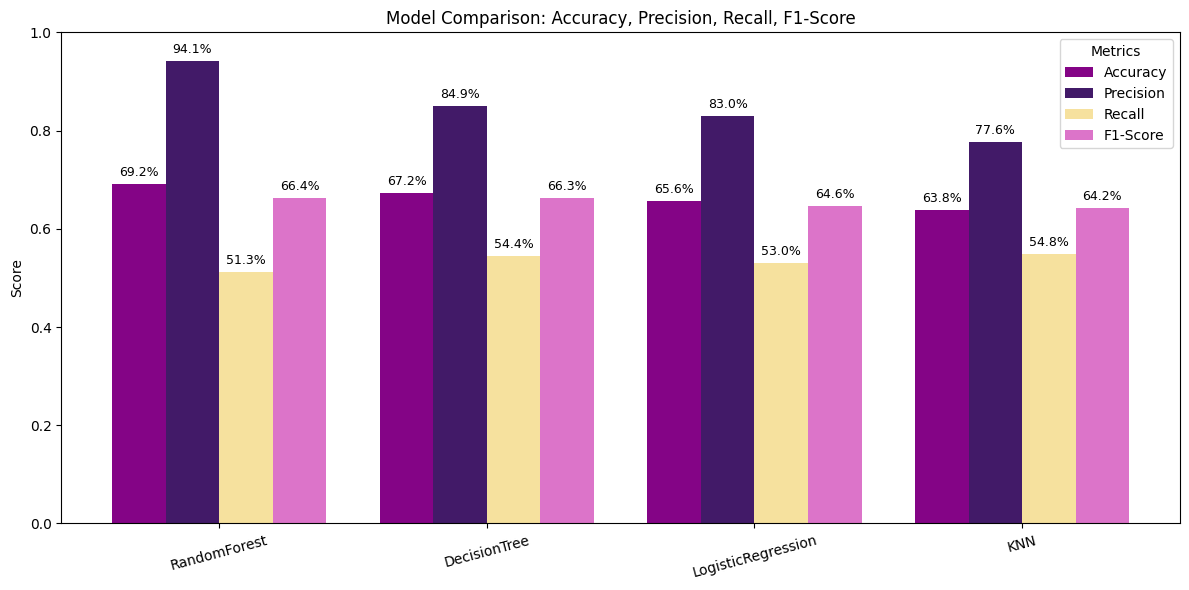

In [36]:
import matplotlib.pyplot as plt
import numpy as np


metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = list(metrics_summary.keys())

x = np.arange(len(model_names))
width = 0.2

# Custom colors for each metric
colors =  ["#840486", '#421a68', "#F6E19E", "#dc74c9"]

plt.figure(figsize=(12, 6))

for i, (metric, color) in enumerate(zip(metric_names, colors)):
    values = [metrics_summary[model][metric] for model in model_names]
    bars = plt.bar(x + i * width, values, width=width, label=metric, color=color)

    # Add percentage labels on top of each bar
    for bar, val in zip(bars, values):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,
            f"{val * 100:.1f}%",  # show as %
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks(x + width * (len(metric_names)-1)/2, model_names, rotation=15)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Comparison: Accuracy, Precision, Recall, F1-Score")
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()



<a id="best_pipeline"></a>

### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>8.2 Extract from best model pipeline</span></b></span></b>
⬆️ [Contents](#contents_table)

In [37]:

from imblearn.pipeline import Pipeline as ImbPipeline

final_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42))
])



<a id="top_features"></a>

### <b><span style='color:#ff00ff'></span><span style='color:#ff00ff'>8.3. Plot top features</span></b></span></b>

⬆️ [Contents](#contents_table)

In [38]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

#   Final pipeline with best parameters
final_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(class_weight='balanced',
                                   n_estimators=200,
                                   max_depth=20,   # Example best param
                                   random_state=42))
])

#   Fit on FULL training set
final_pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Product_importance'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        n_estimators=200, random_state=42))])

Features: 15 | Importances: 15


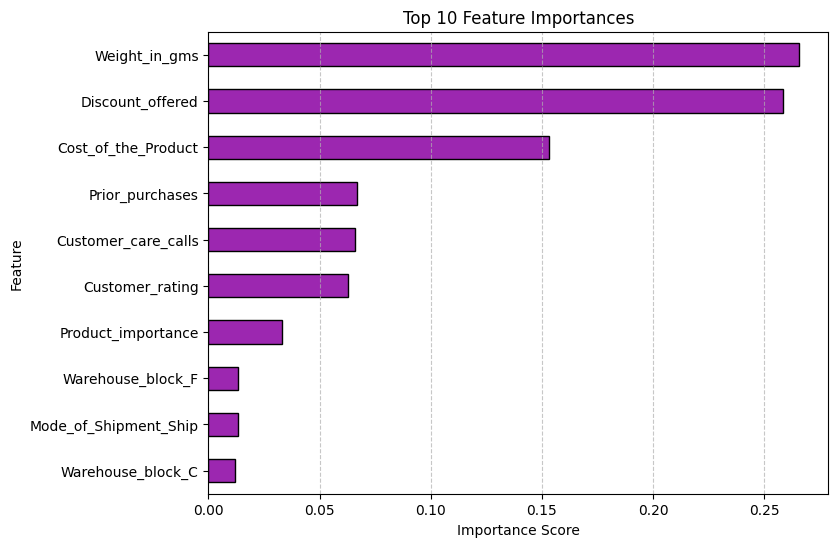

In [39]:
#  Extract the fitted model
rf_model = final_pipeline.named_steps['clf']

#  Get proper feature names
ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
final_features = num_features + list(ohe_features) + ord_features

#  Check size match
print(f"Features: {len(final_features)} | Importances: {len(rf_model.feature_importances_)}")

#  Make Series and plot top 10
importances = pd.Series(rf_model.feature_importances_, index=final_features)
top10 = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top10.sort_values().plot(kind='barh', color='#9C27B0', edgecolor='black')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<a id="conclusion"></a>
## <p style="background-color:#9C27B0; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 9 | Conclusion</p>

⬆️ [Contents](#contents_table)


<a id="conclusion"></a>

<div style="border-radius:10px; padding: 15px; background-color:rgb(241, 191, 250); font-size:120%; text-align:left">

<h3 align="left"><font color=purple><b>Conclusion:</b></font></h3>

<font color=black>
In this project, we performed a complete analysis of the shipment dataset, conducted extensive EDA, handled data preprocessing, and developed multiple classification models to predict whether a product will be delivered on time or delayed.
<br><br>
After comparing performance metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC, we identified the <b>Random Forest Classifier</b> as the best-performing model for this problem.
<br><br>
The Random Forest model achieved the highest overall accuracy while providing a strong balance between precision and recall. Most importantly, it delivered the highest <b>recall</b> for the late delivery class, which aligns with our key objective of minimizing false negatives and improving proactive shipment management.
<br><br>
This predictive model can help the company take early action to address potential delays, improving customer satisfaction and protecting the company’s reputation.
</font>

</div>



In [41]:
with open("best_model.pkl","wb") as file:
    pickle.dump(best_model,file)


<h2 align="Center"><font color='#ff00ff'><b>Thank you!</b></font></h2>